# 방범용CCTV 위치와 인구 데이터 분석
- https://data.busan.go.kr/bdip/opendata/detail.do?publicdatapk=15082060&searchKeyword=%EB%B0%A9%EB%B2%94%EC%9A%A9%20CCTV&searchOption=OR&from=dsh&uuid=912b60e5-f38f-4197-8709-7eb8a0bda33c#n
- 파일데이터 CSV로 다운로드 부산광역시_방범용 CCTV 정보_20230622.CSV 다운로드
- 목표:CCTV 수를 파악하고, 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [1]:
!pwd

/home/jovyan/data


In [2]:
import pandas as pd 
file_path = "./ref/부산광역시방범용CCTV정보20230622.csv"
CCTV = pd.read_csv(file_path,encoding="EUC-KR")
CCTV.sample(3)


,CCTV 명칭,CCTV 좌표,CCTV 그룹
3906,(13차)_광안동_205우성캐슬_앞_(고2),"10.1.10.126:0:0:0:0:0:0,10.1.10.126:9402:",수영-13차
2419,0088-4-화명동2287_코오롱하늘채2차_후문사거리_고1,"10.1.10.83:0:0:0:0:0:0,10.1.10.83:9400:",북구-4차
2585,(9차)_화명1동_화명대로94번길39_화명그린힐아파트,"10.1.11.179:0:0:0:0:0:0,10.1.11.179:9400:",북구-9차


In [3]:
# CCTV.columns = ["x","xx","local"]
cctv = CCTV.rename(columns={"CCTV 그룹":"local"})['local']

In [4]:
#방법1
cctv = cctv.apply(lambda x:x.split("-")[0])
#apply 는 판다스의 함수 이므로 데이터 프레임 형식으로 반환 
#- 기준으로 자르고, 0번째 것 반환

#방법2 
# local_list = []
# for v in cctv:
#     local_list.append(v.split("-")[0])
# cctv = pd.Series(local_list)

#방법3 
# 'cctv' 시리즈에서 정규 표현식을 사용하여 특정 패턴에 맞는 문자열을 추출합니다.
# 정규 표현식 r"(\D+)-"는 숫자가 아닌 문자들(\D+)을 하이픈(-) 이전까지 추출합니다.
# 추출된 문자열에서 첫 번째 그룹([0])을 선택합니다.
# cctv = cctv.str.extract(r"(\D+)-")[0]

# 추출된 'cctv' 시리즈의 각 값의 빈도수를 세고 출력합니다.
cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [5]:
cctv.sample(3)

,local,count
3,동래,404
15,중구,337
13,서구,348


- 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do
- <hr>
- 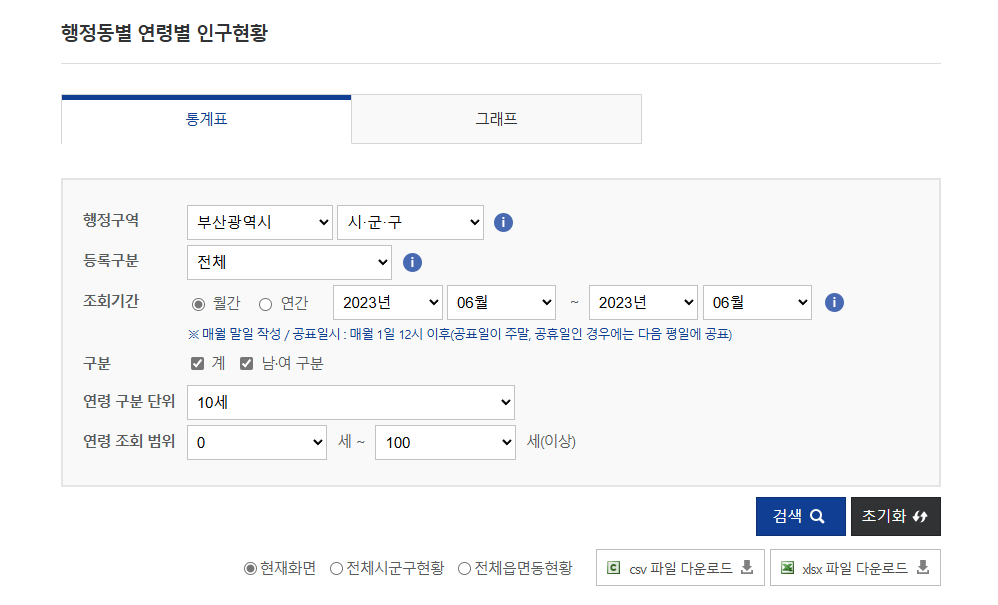

In [6]:
import pandas as pd 

import warnings
warnings.simplefilter("ignore",UserWarning)

file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)
ori.head()

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15
2,2614000000,부산광역시 서구,"104,449","104,449","5,060","7,063","12,272","10,400","13,778","16,812",...,"3,447","6,366","5,059","6,730","8,260","10,223","7,044","3,969",632,12
3,2617000000,부산광역시 동구,"86,809","86,809","3,903","4,636","9,480","10,598","11,324","13,941",...,"2,254","4,847","4,991","5,212","6,703","8,376","6,120","3,566",494,10
4,2620000000,부산광역시 영도구,"107,006","107,006","4,364","6,815","10,089","9,716","13,733","17,687",...,"3,324","4,551","4,448","6,540","8,538","11,533","8,255","4,438",601,17


In [7]:
data = ori[['행정기관','총 인구수']]
data.columns = ["local","population"]
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x: x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [8]:
# cctv = cctv.sort_values(by="local", ascending=True)
# data = data.sort_values(by="local", ascending=True)
# 방법 1
# total.columns = ['local','count','localx','population']
# total = total.drop(columns=['localx'])
# total = pd.concat([cctv,data],axis=1)
# 방법 2
# total = total.drop(total.columns[2],axis=1) # 이름이 같을경우 인덱스가 사용안됨.
# total

In [9]:
# 공백 조심 data["local"] = data["local"].apply(lambda x: len(x))
data["local"] = data["local"].apply(lambda x: x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip())

In [10]:
total = pd.merge(cctv, data, on='local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by="population", ascending=False)
total=total.set_index('local') #중요함 . 
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.3, 0.3, '한글')

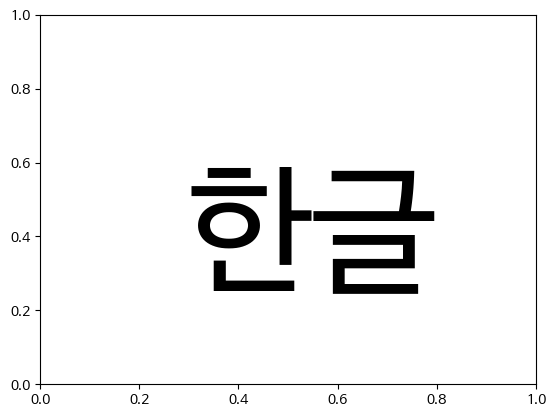

In [11]:
# OS에 사용가능한 ,설치된 폰트를 나열 
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import rc 
import matplotlib.font_manager as fm 

#리눅스용 폰트 경로 설정 
plt.rc('font',family="NanumBarunGothic")
plt.text(0.3,0.3,'한글',size=100)

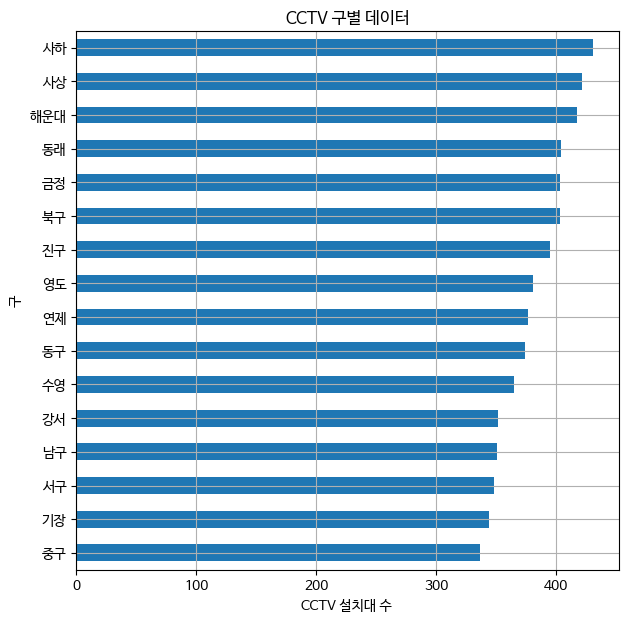

In [12]:
# plt.figure()
total['count'].sort_values().plot(x='count',y='local',kind="barh",grid=True,figsize=(7,7),ylabel="구")
plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수 ")
plt.show()

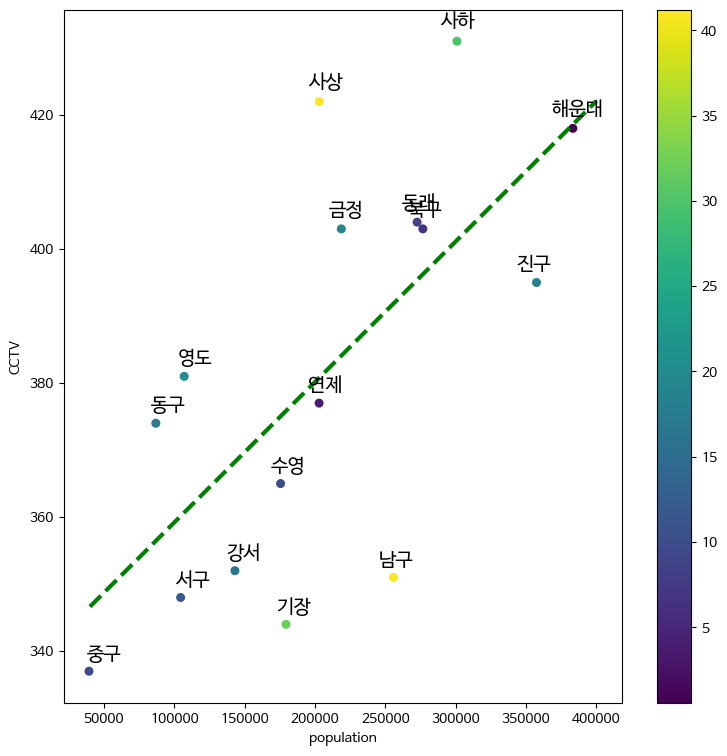

In [13]:
import numpy as np 
fp1 = np.polyfit(total['population'],total['count'],1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000,400000,10)
plt.figure(figsize=(9,9))
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')

#오차 
total['err'] = np.abs(total['count']-f1(total['population']))

plt.scatter(total['population'],total['count'],s=30,c=total['err'])
plt.xlabel('population')
plt.ylabel('CCTV')
plt.plot()

#점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i]*0.96,total['count'].iloc[i]*1.005,total.index[i],fontsize=14)
plt.colorbar()    
plt.show()

In [14]:
total['local']
total['count']
total['population']
# for n in range(len(total['local'])):
plt.text(total['population'][0],total['count'][0],total['local'][0],fontsize=15)

KeyError: 'local'